In [1]:
%matplotlib inline

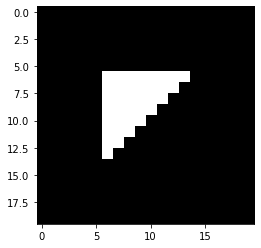

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

test=np.zeros((20,20))
for x in range(20):
    for y in range(20):
        if x>5 and y>5 and y<20-x:
            test[x,y]=1
plt.figure()
plt.imshow(test, cmap=cm.gray)
plt.show()

Hier wurde zur Demo ein Bild aus 20 mal 20 Pixeln erzeugt und angezeigt. Das dient zur Veranschaulichung der Kantenerkennung.  
Der Befehl convolve2d für die "Faltung" der Bildmatrix mit der Filtermatrix durch. 

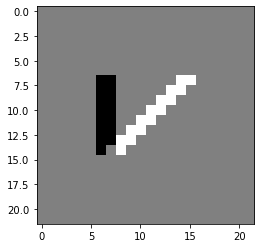

In [3]:
from scipy.signal import convolve2d
filterX= np.zeros((3,3))
filterX[1,0]=-0.5
filterX[1,2]=0.5
dx = convolve2d(test,filterX)
plt.imshow(dx,cmap=cm.gray)

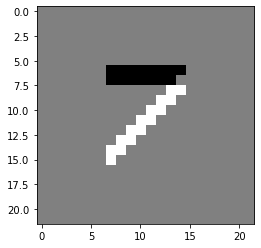

In [4]:
filterY= np.zeros((3,3))
filterY[0,1]=-0.5
filterY[2,1]=0.5
dy = convolve2d(test,filterY)
plt.imshow(dy,cmap=cm.gray)

Nachdem die Filterung in x- bzw. in y-Richtung durchgeführt wurde, werden beide Bilder kombiniert indem man die Wurzel der Summe der Quadrate bildet.


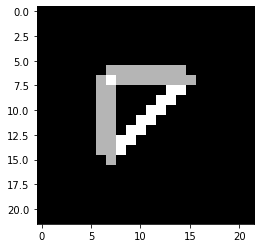

In [5]:
kanten = np.sqrt(dx*dx+dy*dy)
plt.imshow(kanten,cmap=cm.gray)

Quelle: https://www.youtube.com/watch?v=l_WH6rUFiyU&list=PLb0zKSynM2PCmp5J5LWM3PcZXBaCoQkXj&index=28&frags=wn

https://www.youtube.com/watch?v=W7OpxFbrD84&list=PLb0zKSynM2PCmp5J5LWM3PcZXBaCoQkXj&index=29



Einfacher als der Kantenfilter oben, der aus einer 3x3-Matrix besteht, ist der sogenannte Roberts Cross Filter. Er besteht aus zwei Matrizen:
$$ m_x =\begin{bmatrix} +1 & 0 \\0 & -1\end{bmatrix}  und  m_y =\begin{bmatrix} 0 & +1 \\-1 & 0 \end{bmatrix}$$
Der Vorteil ist, dass hier weniger zu rechnen ist.

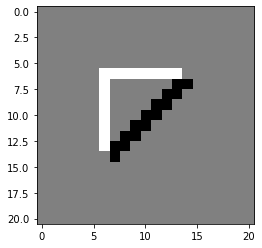

In [6]:
mx=np.array([[1,0],[0,-1]])
my=np.array([[0,1],[-1,0]])
Gx=convolve2d(mx,test)
Gy=convolve2d(my,test)
plt.imshow(Gx,cmap=cm.gray)
#plt.imshow(Gy,cmap=cm.gray)

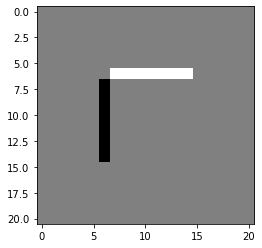

In [7]:
plt.imshow(Gy,cmap=cm.gray)

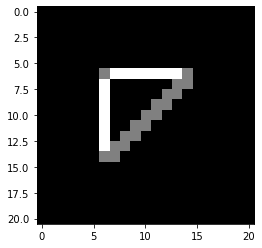

In [8]:
plt.imshow(np.abs(Gx)+np.abs(Gy),cmap=cm.gray)

In [9]:
from PIL import Image

clown=np.array(Image.open("bilder/cln1.png").convert("L"))
plt.imshow(clown, cmap=cm.gray)

ModuleNotFoundError: No module named 'PIL'

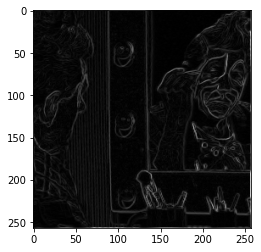

In [15]:
mx=np.array([[1,0],[0,-1]])
my=np.array([[0,1],[-1,0]])
Gx=convolve2d(mx,clown)
Gy=convolve2d(my,clown)
plt.imshow(np.abs(Gx)+np.abs(Gy),cmap=cm.gray)


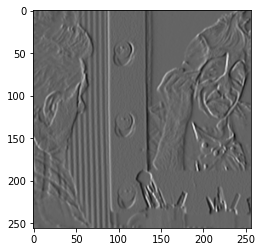

In [16]:
from scipy.ndimage.filters import sobel
clown01=clown/255.0
sobX= sobel(clown01,1)
plt.imshow(sobX,cmap=cm.gray)

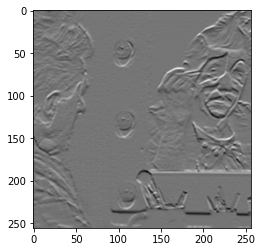

In [17]:
sobY= sobel(clown01,0)
plt.imshow(sobY,cmap=cm.gray)

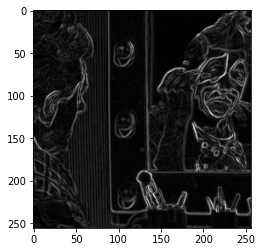

In [18]:
plt.imshow(np.abs(sobX)+np.abs(sobY),cmap=cm.gray)

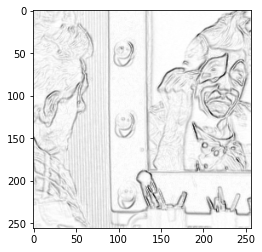

In [19]:
plt.imshow(np.abs(sobX)+np.abs(sobY),cmap=cm.gray_r)

Quelle zu Sobel: https://www.youtube.com/watch?v=W7OpxFbrD84&list=PLb0zKSynM2PCmp5J5LWM3PcZXBaCoQkXj&index=29